## Gaussian Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# Config parameters

N = 10                     # number of training points
n = 50                     # number of test points
sn = 0.00005               # noise variance
kernel_param = 0.1         # rbf kernel parameter
gamma= 0.5/kernel_param    # Overall rbf_kernel() gamma

In [3]:
# Definition of the unknown function (sine) we are trying to approximate

f = lambda x: np.sin(0.9*x).flatten()

In [4]:
# Images centering
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:

def plot_f(x,y, title, symbol, color, size):
    plt.figure(1, figsize=size)
    plt.clf()
    plt.plot(x, y, symbol, color = color)
    plt.title(title)
    plt.axis([-5, 5, -4, 4])
    plt.grid()

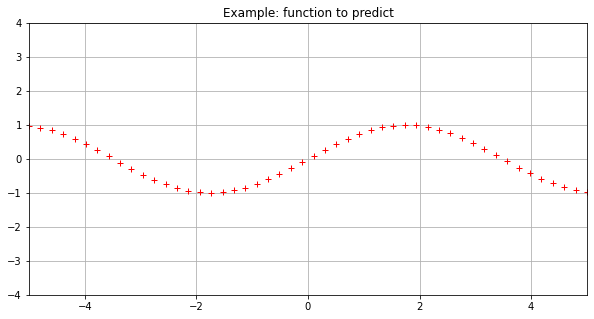

In [6]:
# Example 
Xe = np.linspace(-5,5, n)
Ye = f(Xe)

plot_f(Xe, Ye, 'Example: function to predict', symbol='+', color='r', size=(10, 5))

#### Test points

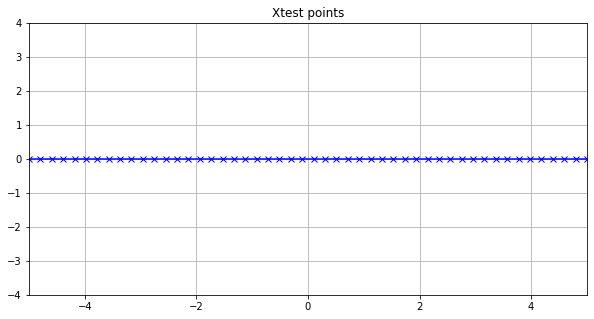

In [7]:
# We pick up n points equally spaced on x-axis in the range (-5, 5)
Xtest = np.linspace(-5,5, n).reshape(-1,1)

y = np.zeros(n)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, y, marker='x', color = 'b')
plt.title('Xtest points')
plt.axis([-5, 5, -4, 4])
plt.grid()

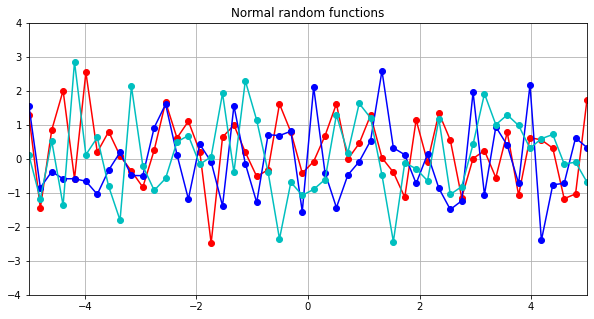

In [8]:
# We sample 3 times n random points from a standard normal 
sample_f = np.random.normal(size=(n,3))

plt.figure(1, figsize=(10, 5))

plt.clf()
plt.plot(Xtest, sample_f[:,0], marker='o', color = 'r')
plt.plot(Xtest, sample_f[:,1], marker='o', color = 'b')
plt.plot(Xtest, sample_f[:,2], marker='o', color = 'c')
plt.title('Normal random functions')

plt.axis([-5, 5, -4, 4])
plt.grid()

In [9]:
# We calculate the covariance matrix (kernel) on the 50 equally spaced Xtest points 
Kss = rbf_kernel(Xtest, Xtest, gamma)

# Cholesky matrix calculation
Lss = np.linalg.cholesky(Kss + sn*np.eye(n))

# Note that Cholesky matrix is used to create correlations among random variables. 
# Suppose that x1 and x2 are independent standard normal variables. 
# The matrix Ls can be used to create new variables z1 and z2 such that the covariance of z1 and z2 equals Σ
# In particular, if you generate p standard normal variates, the Cholesky transformation maps the variables into variables
# for the multivariate normal distribution with covariance matrix Σ and centered at the origin (denoted MVN(0, Σ)).

# See proof below

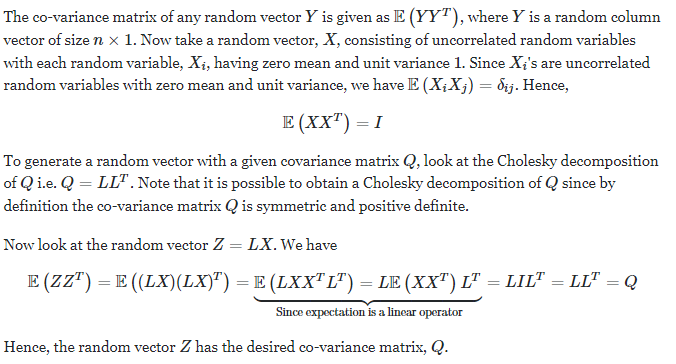

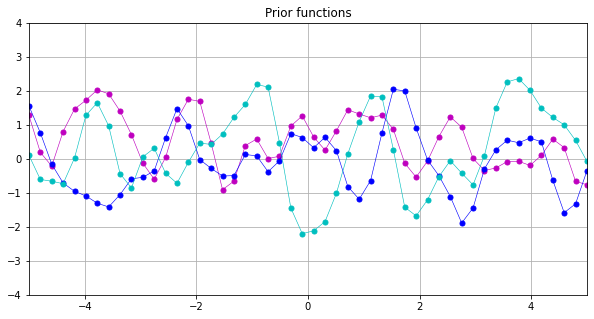

In [10]:
# By Cholesky trasformation we force the priors to have the same covariance matrix of the equally spaced Xtest points 

f_prior = np.dot(Lss, sample_f)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, f_prior[:,0], marker='o', color = 'm', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,1], marker='o', color = 'b', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,2], marker='o', color = 'c', linewidth=0.6, markersize=5)
plt.title('Prior functions')
plt.axis([-5, 5, -4, 4])
plt.grid()

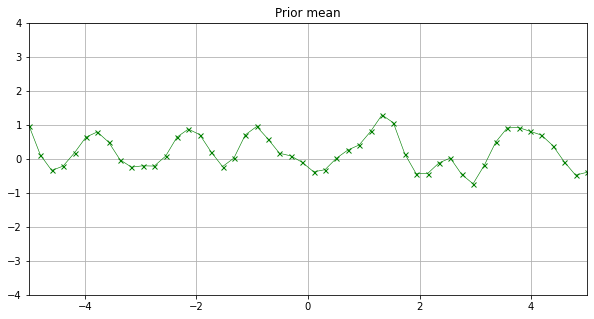

In [11]:
# The resulting priors have mean at each x that tends to zero wwith increasing n

prior_mean = f_prior.mean(axis=1)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, prior_mean, marker='x', color = 'g', linewidth=0.6, markersize=5)
plt.title('Prior mean')
plt.axis([-5, 5, -4, 4])
plt.grid()

#### Train points

Xtrain:
[[-0.51020408]
 [ 2.55102041]
 [ 1.53061224]
 [ 1.73469388]
 [ 3.7755102 ]
 [-5.        ]
 [-3.7755102 ]
 [-0.10204082]
 [-3.36734694]
 [ 3.57142857]]
f(Xtrain):
[-0.44321649  0.74841849  0.98138616  0.99995419 -0.25356751  0.97753012
  0.25356751 -0.0917077  -0.11075273 -0.07262906]
y = f(X) + noise: 
[-0.44323941  0.74843736  0.98138512  1.00001771 -0.253601    0.97742643
  0.25371822 -0.09169918 -0.11066638 -0.07272147]


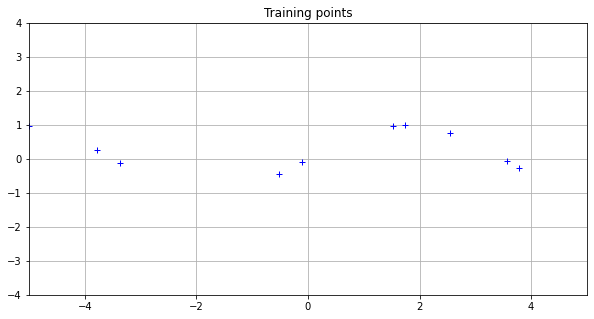

In [12]:
# We sample now some input points without noise from the initial unknown sine function and we use them as training points 
# to adjust our prior functions

# Sample x points
Xdomain = np.reshape(Xtest, np.product(Xtest.shape))
Xtrain = np.random.choice(Xdomain, size=(N, 1))
print('Xtrain:')
print(Xtrain)

print('f(Xtrain):')
print(f(Xtrain))

# Coresponding y=f(x) with noise
Ytrain = f(Xtrain) + sn*np.random.randn(N)

print('y = f(X) + noise: ')
print(Ytrain)

'''
plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, f(Xtest), marker='o', color = 'g', linewidth=0.6, markersize=3)
plt.plot(Xtrain, Ytrain, symbol='+', color='r', markersize=10)

plt.title('Training points (+)')
plt.axis([-5, 5, -3, 3])
'''

plot_f(Xtrain, Ytrain, 'Training points', symbol='+', color='b', size=(10,5))

### Theory overview

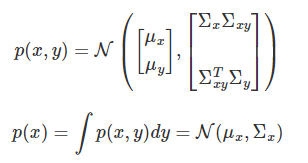

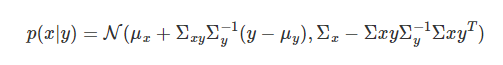

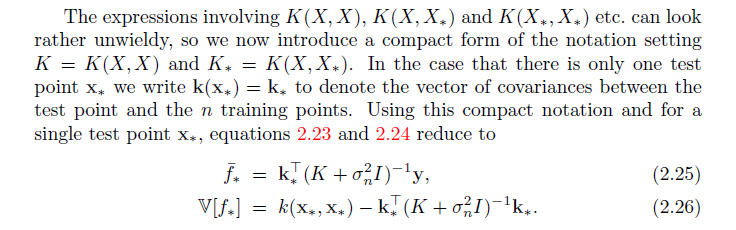

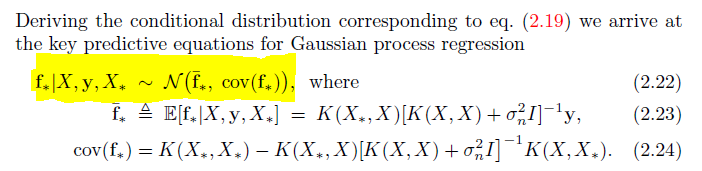

In [13]:
# By using the Cholesky decomposition we have:

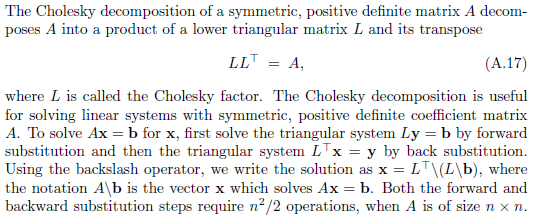

In [14]:
# The algorithm is:

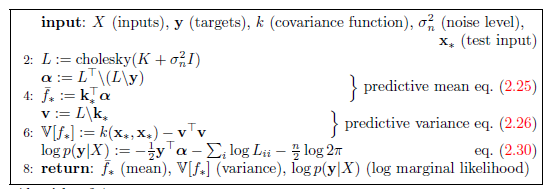

In [19]:
# Compute mean at our train points

K = rbf_kernel(Xtrain, Xtrain, gamma)
L = np.linalg.cholesky(K + sn*np.eye(len(Xtrain)))

Ly = np.linalg.solve(L, Ytrain)
alpha = np.linalg.solve(L.T, Ly)

Ks = rbf_kernel(Xtrain, Xtest, gamma)

meanFs = np.dot(Ks.T, alpha)

print('Predictive mean eq.2.25')
print(meanFs.shape)
print(meanFs)



# Compute the variance and standard deviation at our train points

v = np.linalg.solve(L, Ks)
covFs = Kss - np.dot(v.T, v)   # Covariance matrix
varFs = np.diag(covFs)         # np.diag gets the diagonal elements (variance) from argument matrix
stdFs = np.sqrt(varFs)
print('\nPredictive variance, diagonal of eq.2.26')
print(meanFs.shape)
print(varFs)

Predictive mean eq.2.25
(50,)
[ 9.77377569e-01  7.95496840e-01  4.37944026e-01  2.05491280e-01
  1.86684548e-01  2.65229762e-01  2.53699651e-01  8.06868732e-02
 -1.10652774e-01 -1.63977983e-01 -1.05047886e-01 -3.97319633e-02
 -9.51617753e-03 -1.47839617e-03 -1.51199455e-04 -2.84626375e-05
 -2.76175726e-04 -2.72219179e-03 -1.76979310e-02 -7.56475907e-02
 -2.11773163e-01 -3.84739489e-01 -4.43214541e-01 -3.02742374e-01
 -9.17054046e-02  2.47978496e-02  3.66889649e-02  1.96772411e-02
  2.66252317e-02  1.03574268e-01  3.19301647e-01  6.75062408e-01
  9.81357761e-01  9.99991222e-01  7.79293790e-01  6.29373396e-01
  6.89507542e-01  7.48401120e-01  6.02169649e-01  3.53628769e-01
  1.90177737e-01  8.99847665e-02 -7.27404808e-02 -2.53572866e-01
 -2.91599295e-01 -1.86282363e-01 -7.27787282e-02 -1.80172944e-02
 -2.87418121e-03 -2.98122482e-04]

Predictive variance, diagonal of eq.2.26
(50,)
[4.99975001e-05 3.40646891e-01 8.09471089e-01 9.48301424e-01
 7.80781102e-01 2.91567678e-01 4.99969176e-05 8

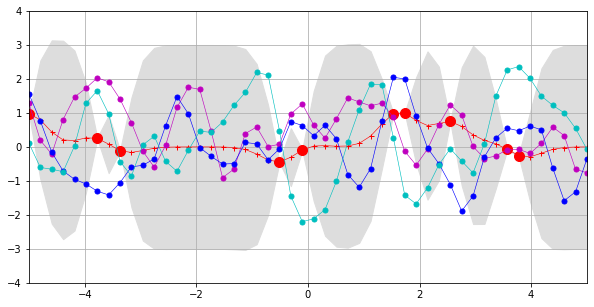

In [23]:
# Let's plot the mean and the standard deviation
plt.figure(1, figsize=(10, 5))
plt.clf()

# Plot train points
plt.plot(Xtrain, Ytrain, 'ro', ms=10)

# Plot posterior mean
plt.plot(Xtest, meanFs, 'r', marker='+', color = 'r', linewidth=0.6, markersize=5)

# Plot posterior confidence region
plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")

# Plot (unconstrained) priors
plt.plot(Xtest, f_prior[:,0], marker='o', color = 'm', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,1], marker='o', color = 'b', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,2], marker='o', color = 'c', linewidth=0.6, markersize=5)

plt.axis([-5, 5, -4, 4])
plt.grid()


# As we can see below the sampled priors are  not constrained to pass through the train points 

In [17]:
# We sample now 3 regression functions from the posterior distribution

f_post = np.random.multivariate_normal(meanFs, covFs, 3).T
f_post

array([[ 9.81488230e-01,  9.72157856e-01,  9.78215939e-01],
       [ 1.56793990e+00,  2.43656110e-01,  7.23002597e-01],
       [ 1.44653401e+00,  4.38842903e-01,  7.34569459e-01],
       [ 1.04927231e+00,  1.37289915e-01,  1.23635958e+00],
       [ 9.49712956e-01, -5.50398532e-01,  1.59648972e+00],
       [ 6.03102817e-01, -1.19100684e-01,  1.15532397e+00],
       [ 2.48099940e-01,  2.50766536e-01,  2.59031698e-01],
       [ 6.30868555e-02,  5.27332864e-02, -1.19451813e-01],
       [-1.10834114e-01, -1.10941537e-01, -1.18693384e-01],
       [ 4.06994541e-02, -8.19251606e-02, -4.96166176e-01],
       [-2.73868422e-03,  2.99588997e-01, -8.67433816e-01],
       [-2.95780489e-01,  7.02526146e-01, -5.17890424e-01],
       [-1.73788415e-01,  8.05197611e-01,  6.20786409e-02],
       [ 4.45462415e-02,  2.30057105e-01,  6.01259971e-01],
       [ 1.72850172e-01, -3.00957318e-01,  1.69654347e+00],
       [ 2.78249856e-01, -2.04686737e-01,  2.82279052e+00],
       [ 3.35912990e-01, -5.25967465e-01

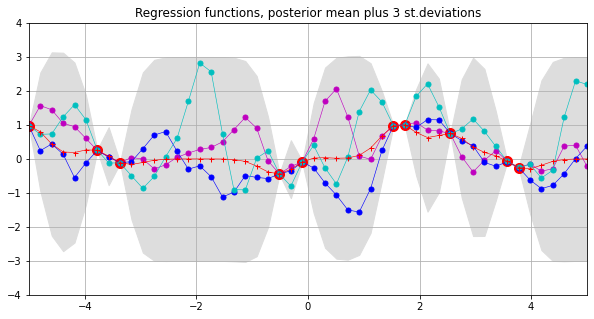

In [18]:
# Plot the functions sampled from the posterior distribution

plt.figure(1, figsize=(10, 5))
plt.clf()

plt.plot(Xtrain, Ytrain, 'ro', ms=10)

plt.plot(Xtest, f_post[:,0], marker='o', color = 'm', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,1], marker='o', color = 'b', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,2], marker='o', color = 'c', markersize=5, linewidth=0.6)

plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")

plt.plot(Xtest, meanFs, marker='+', color='r', markersize=5, linewidth=0.6)

plt.savefig('predictive.png', bbox_inches='tight')
plt.title('Regression functions, posterior mean plus 3 st.deviations')
plt.axis([-5, 5, -4, 4])
plt.grid()